# Python assignment

|Name|SNR|UNR|
|----|---|----|
|Luisa Loiacono|2041503|u657424|

# Research question
The research question investigates whether the success of traditional parties, at local level, is related to the size of the municipalities. The analysis aims at showing that, at local level, as the population size of a municipality decreases, the traditional top-down strcutured parties are less likely to succeed, while the local lists become stronger in smaller municipalities.




#Motivation
Lately, the growth of the populist movements worldwide has drawn the attention to the mechanisms behind the elections. Understanding the motivations leading to the success of the populist parties is of pivotal importance in analyzing the current situation. The intuition behind this analysis, supported by the previous literature (*Vampa, 2016*), is that in small municipalities the local lists, not supported by traditional top-down structured parties, are preferred thanks to their proximity to the social fabric. In this specific case, I will use a dataset from the European and local elections held in Italy on May 26, 2019. The dataset includes all the municipalities from Emilia Romagna region, and it was collected from the 'Eligendo' section of the website of the Italian Ministry of Internal Affairs (https://dait.interno.gov.it/elezioni). During the elections held in May 2019, the municipalities included in this dataset, voted simultaneously for both the local elections (mayor) and the European elections. The expectation is that as the municipalities get smaller, the difference in the votes obtained at the European and local elections increases. 



> *Davide Vampa (2016), 'Declining partisan representation at the sub-national level: assessing and explaining the strengthening of local lists in Italian municipalities (1995–2014)', Local Government Studies, 42:4, 579-597, DOI: 10.1080/03003930.2016.1146137*



#Method
The method used is based on the data analysis. The main variable considered is called 'diff_dx' and it is equal to the difference, per municipality, between the percentage of votes for the right party at the European level and the percentage of votes for the right party at the local level. This variable suggests to what extent the voters are consistent when they vote, the smaller the difference, the more the voters are consistent, the stronger the traditional party. The other relevant variable to the analysis is the population variable which is expressed in number of inhabitants. In order to keep the analysis simple and clear, the method will involve descriptive statistics, some relavant graphs and two different regressions. The relationship between the two variables is expected to be negative, as the population increases, the variable 'diff_dx' decreases.


# Preview of the answers
There is evidence of a negative relationship between the population and the difference in votes between the European and the local parties, meaning that in smaller municipalities, the voters shift their preferences from the traditional top-down right wing party (at the EU level) to the local informal lists (at local level).

# Main Assumptions
The main assumptions are:
- the voters that did not vote the right party at the local elections, voted the informal local party (the so called 'lista civica') and we assume that they did not move the left party: the only options are either right or local party;
- a nexus of causality between the size of the municipality and the difference in votes can be considered;
- the voters swtich their preferences because they trust the local party more than they trust the traditional party.

# Data

Dataset: 
- the dataset is retrieved from https://dait.interno.gov.it/elezioni, the dataset was not available online;
- the variables are: 'municipality', 'pop', number of inhabitants in 2018, and 'diff_dx', the difference, per municipality, between the percentage of votes for the right party at the European level and the percentage of votes for the right party at the local level. For example, if in the municipality of Ferrara, the right wing gained the 45% at the European elections and the 38% at the local elections, the variable will be 7% which will suggest that 7% of voters voted a local list instead of voting the traditional right party. 

# Python code


In the following code I import the library and the data.

In [187]:

# Importing library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
from scipy import stats, optimize
import random
import statistics as st
from scipy.stats import skew
import pylab
import statsmodels.api as sm
from numpy import pi, arange, sin, linspace
from bokeh.plotting import output_file, figure, show
from bokeh.models import LinearAxis, Range1d

# Hiding
import warnings
warnings.filterwarnings('ignore')

# Setting the plotting style
%matplotlib inline
plt.style.use('seaborn')

# Importing the data
df = pd.read_csv ('/AEA.csv', delimiter=';')
print (df)
df.info()

       pop           municipality  p_votes_eu  turnover_eu  p_votes_c  diff_dx
0      972               MORFASSO        77.7         60.8       10.9     66.8
1     8898              FISCAGLIA        53.0         68.0       10.9     42.1
2    15957              NONANTOLA        33.6         69.3       12.2     21.4
3     9110               REGGIOLO        39.7         73.1       12.7     27.0
4    19234            CASALGRANDE        41.1         68.1       13.3     27.8
..     ...                    ...         ...          ...        ...      ...
116  14833                RUBIERA        38.2         70.9       58.9    -20.7
117    777            PREMILCUORE        57.4         83.8       59.6     -2.2
118  10802  SAN FELICE SUL PANARO        56.1         72.7       61.3     -5.2
119   1874     ROCCA SAN CASCIANO        57.3         72.0       62.5     -5.2
120    718                   BORE        65.3         77.3       69.1     -3.8

[121 rows x 6 columns]
<class 'pandas.core.frame.Da

In [188]:
# Changing the name of the variable 'pop'
new_df = df.rename(columns = {"pop": "population", 
                                  }) 
print (new_df)

     population           municipality  ...  p_votes_c  diff_dx
0           972               MORFASSO  ...       10.9     66.8
1          8898              FISCAGLIA  ...       10.9     42.1
2         15957              NONANTOLA  ...       12.2     21.4
3          9110               REGGIOLO  ...       12.7     27.0
4         19234            CASALGRANDE  ...       13.3     27.8
..          ...                    ...  ...        ...      ...
116       14833                RUBIERA  ...       58.9    -20.7
117         777            PREMILCUORE  ...       59.6     -2.2
118       10802  SAN FELICE SUL PANARO  ...       61.3     -5.2
119        1874     ROCCA SAN CASCIANO  ...       62.5     -5.2
120         718                   BORE  ...       69.1     -3.8

[121 rows x 6 columns]


There are no missing data.

In [189]:
# Showing the head of the dataset
new_df.head(15)


,population,municipality,p_votes_eu,turnover_eu,p_votes_c,diff_dx
0,972,MORFASSO,77.7,60.8,10.9,66.8
1,8898,FISCAGLIA,53.0,68.0,10.9,42.1
2,15957,NONANTOLA,33.6,69.3,12.2,21.4
3,9110,REGGIOLO,39.7,73.1,12.7,27.0
4,19234,CASALGRANDE,41.1,68.1,13.3,27.8
5,32473,SAN LAZZARO DI SAVENA,37.0,74.0,13.3,23.7
6,10346,LANGHIRANO,57.1,74.0,13.3,43.8
7,6471,GUALTIERI,47.1,66.3,13.4,33.7
8,11263,SANT'ILARIO D'ENZA,38.9,69.6,14.9,24.0
9,30849,VALSAMOGGIA,38.9,70.7,15.0,23.9


## Variables description
The dataset contains 121 observations and 6 variables. The variables are:


*   'population': population in number of inhabitants in 2018;
*   'municipality': name of the municipality;
*   'p_votes_eu': percentage of votes for the right wing party at the European elections;
*   'p_votes_c': percentage of votes for the right wing party at the local elections;
*   'turnover_eu': turnover for the European elections;
*   'diff_dx': 'p_votes_eu' - 'p_votes_c'.







## Descriptive statistics

## Mean, variance, median, outliers


###Difference in votes

In [190]:
# Descriptive statistics for Difference in votes
new_df.diff_dx.describe()

count    121.000000
mean      16.916529
std       13.224153
min      -20.700000
25%        7.800000
50%       15.400000
75%       22.700000
max       66.800000
Name: diff_dx, dtype: float64

In [191]:
st.median(new_df.diff_dx)

15.4

### Votes EU

In [192]:
# Descriptive statistics for Percentage of votes at the EU level
new_df.p_votes_eu.describe()

count    121.000000
mean      48.635537
std       10.123256
min       32.200000
25%       39.400000
50%       47.600000
75%       56.500000
max       77.700000
Name: p_votes_eu, dtype: float64

In [193]:
st.median(new_df.p_votes_eu)

47.6

The mean and median are similar, thanks to this observation, together with the minimum and maximum values, we can state that there are not outliers. This will also be showed graphically.

### Votes Local

In [194]:
# Descriptive statistics for Percentage of votes at the local level
new_df.p_votes_c.describe()

count    121.000000
mean      31.719008
std       13.389531
min       10.900000
25%       21.600000
50%       29.400000
75%       41.400000
max       69.100000
Name: p_votes_c, dtype: float64

In [195]:
st.median(df.p_votes_c)

29.4

As for the votes at local level, the minimum and the maximum values suggest that the values range is larger and that, on average, the votes for the right wing at European level exceed the votes for the right wing at local level.

###Population

In [196]:
# Descriptive statistics for Population
new_df.population.describe()

count       121.000000
mean      17268.768595
std       28460.167208
min         718.000000
25%        5513.000000
50%       10346.000000
75%       16768.000000
max      185273.000000
Name: population, dtype: float64

In [197]:
st.median(new_df.population)

10346

The population size is not homogeneous, in order to make a more accurate analysis, the municipalities will be split in population intervals and categorical variables will be used. It would be more difficult to interpret how the outcomes changes when the population increases by one citizen.

## Scatter Plots

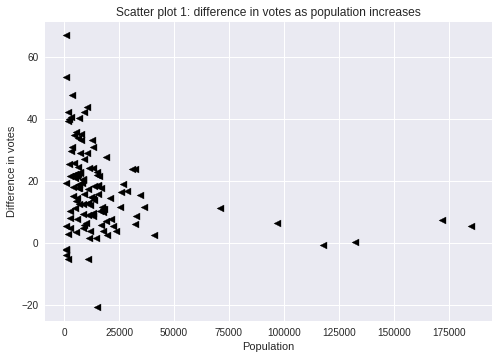

In [198]:
# Scatter plot 1: difference in votes as population increases
plt.scatter(new_df.population, new_df.diff_dx, marker='<', c='black')
plt.title('Scatter plot 1: difference in votes as population increases')
plt.xlabel('Population')
plt.ylabel('Difference in votes')
plt.show()

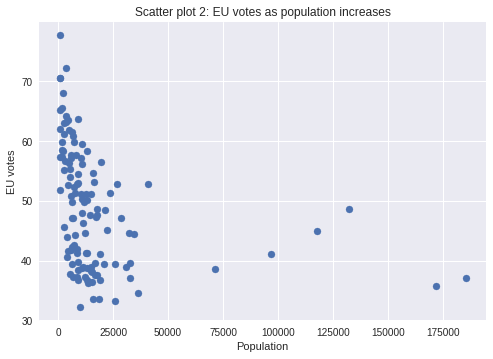

In [199]:
# Scatter plot 2: EU votes as population increases
plt.scatter(new_df.population, new_df.p_votes_eu, marker='o')
plt.title('Scatter plot 2: EU votes as population increases')
plt.xlabel('Population')
plt.ylabel('EU votes')
plt.show()

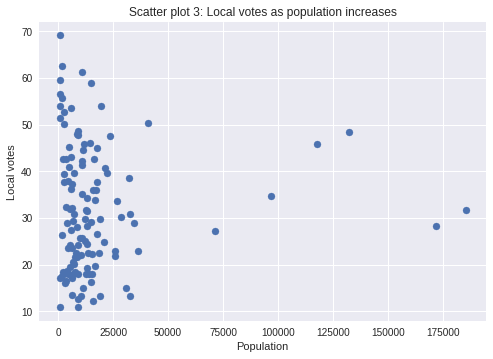

In [200]:
# Scatter plot 3: Local votes as population increases
plt.scatter(new_df.population, new_df.p_votes_c, marker='o')
plt.title('Scatter plot 3: Local votes as population increases')
plt.xlabel('Population')
plt.ylabel('Local votes')
plt.show()

The scatter plots show a correlation between the size of the population and the votes.

1.   Scatter plot 1: there is a slight trend showing that the difference gets bigger as population increases. For municipalities with more than 25,000 inhabitants, the observed difference is almost always (two exceptions) smaller than 20%. The relationship seems to be negative.
2.   Scattor plots 2 and 3 show that the right party gets more votes at the European level compared to the ones it gets at local level.

##Histogram

\begin{equation}
Number \space of \space bins=\frac{max-min}{2*IQR* n^-\frac{1}{3}}
\end{equation}

In [201]:
# Creating one categorical variable for population ranges
new_df['pop_range'] = 1
new_df.loc[(new_df['population'] > 500) & (new_df['population'] <= 999), 'pop_range'] = 2
new_df.loc[(new_df['population'] > 1000) & (new_df['population'] <= 1999), 'pop_range'] = 3
new_df.loc[(new_df['population'] > 2000) & (new_df['population'] <= 2999), 'pop_range'] = 4
new_df.loc[(new_df['population'] > 3000) & (new_df['population'] <= 4999), 'pop_range'] = 5
new_df.loc[(new_df['population'] > 5000) & (new_df['population'] <= 9999), 'pop_range'] = 6
new_df.loc[(new_df['population'] > 10000) & (new_df['population'] <= 19999), 'pop_range'] = 7
new_df.loc[(new_df['population'] > 20000) & (new_df['population'] <= 59999), 'pop_range'] = 8
new_df.loc[(new_df['population'] > 60000) & (new_df['population'] <= 99999), 'pop_range'] = 9
new_df.loc[new_df['population'] > 100000, 'pop_range'] = 10
print (new_df)

     population           municipality  ...  diff_dx  pop_range
0           972               MORFASSO  ...     66.8          2
1          8898              FISCAGLIA  ...     42.1          6
2         15957              NONANTOLA  ...     21.4          7
3          9110               REGGIOLO  ...     27.0          6
4         19234            CASALGRANDE  ...     27.8          7
..          ...                    ...  ...      ...        ...
116       14833                RUBIERA  ...    -20.7          7
117         777            PREMILCUORE  ...     -2.2          2
118       10802  SAN FELICE SUL PANARO  ...     -5.2          7
119        1874     ROCCA SAN CASCIANO  ...     -5.2          3
120         718                   BORE  ...     -3.8          2

[121 rows x 7 columns]


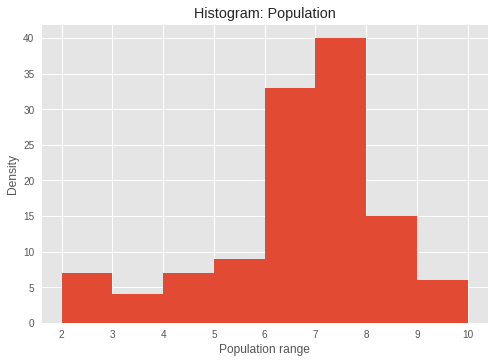

In [202]:
# Histogram: population
plt.style.use('ggplot')
plt.hist(new_df.pop_range, bins=8)
plt.title("Histogram: Population")
plt.xlabel("Population range")
plt.ylabel("Density")
plt.show()

In [203]:
# Skewness
print (skew(new_df.pop_range))

-0.6626221329230414


Both the skewness and the histogram suggest a negative skew.
The population data is not uniformely distributed around the average. In fact, in this case, the data set has its tail extended towards the left, meaning that both the mean and the median are smaller than the mode of the data set.


In [204]:
# EU votes and Local votes over population
x = new_df.population
y = new_df.p_votes_eu
y2 = new_df.p_votes_c
output_file("votes.html")

p = figure(x_range=(0,200000), y_range=(0,100))

p.circle(x, y, color="red")

p.extra_y_ranges = {"foo": Range1d(start=0, end=100)}
p.circle(x, y2, color="blue", y_range_name="foo")
p.add_layout(LinearAxis(y_range_name="foo"), 'left')

show(p)

The plot compares the EU votes to the local ones, as population increases. It merges that the right wing party gained more votes at the European election than it did at the local level.


## Population ranges

The next step is to divide the municipalities according to different population ranges. The ranges considered follow the classification made by the Italian National Institute of Statistics (ISTAT):
1. Less than 500,
2. between 500 and 999;
3. between 1,000 and  1,999;
4. between 2,000 and 2,999;
5. between 3,000 and 4,999;
6. between 5,000 and 9,999;
7. between 10,000 and 19,999;
8. between 20,000 and 59,999;
9. between 60,000 and 99,999;
10. between 100,000 and 249,000.

In [205]:
# Descriptive statistics for the new variable Population range
new_df.pop_range.describe()

count    121.000000
mean       6.239669
std        1.732170
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: pop_range, dtype: float64

I created a new variable 'pop_range' that classifies the municipalities per number of inhabitants, according to the classification reported above.

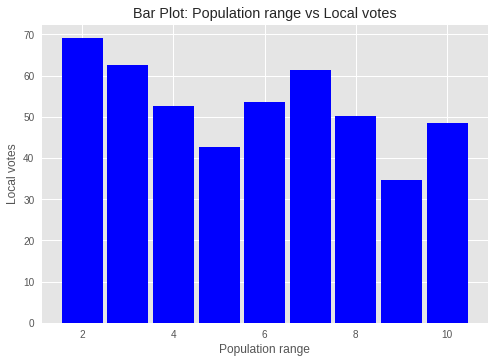

In [206]:
# Bar Plot: Population range against Local votes
plt.bar( new_df.pop_range, new_df.p_votes_c, width=0.9,color='b',align='center')
plt.title("Bar Plot: Population range vs Local votes")
plt.xlabel("Population range")
plt.ylabel("Local votes")
plt.show()

In [213]:
# Local votes average by population range
new_df.groupby("pop_range", as_index=False)["p_votes_c"].mean()

,pop_range,p_votes_c
0,2,45.528571
1,3,40.500000
2,4,36.728571
3,5,28.833333
4,6,28.284848
5,7,30.742500
6,8,30.760000
7,9,31.000000
8,10,38.550000


In [212]:
# EU votes average by population range
new_df.groupby("pop_range", as_index=False)["p_votes_eu"].mean()

,pop_range,p_votes_eu
0,2,65.057143
1,3,60.300000
2,4,58.285714
3,5,55.977778
4,6,48.366667
5,7,44.637500
6,8,43.246667
7,9,39.850000
8,10,41.625000


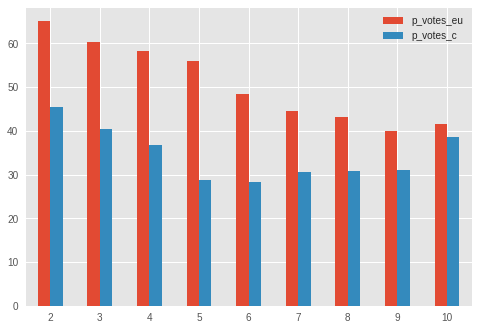

In [215]:
# Clustered bar plot of EU and local votes
p_votes_eu = [65.1, 60.3, 58.3, 56.0, 48.4, 44.6, 43.2, 39.9, 41.6]
p_votes_c = [45.5, 40.5, 36.7, 28.8, 28.3, 30.7, 30.8, 31, 38.6]
index = ['2', '3','4', '5', '6', '7', '8','9','10']
df = pd.DataFrame({'p_votes_eu': p_votes_eu,
                    'p_votes_c': p_votes_c}, index=pop_range)
ax = df.plot.bar(rot=0)


The bar plot compares average votes at EU and local level for the different population ranges.


## Regression 1

\begin{equation}
diff\_dx_i= \alpha + \beta \space pop\_range_i + \epsilon_i 
\end{equation}

Now, I will run a basic OLS regression, with one intercept and one independent variable. The independent variable is the categorical variable 'pop_range' and the result suggests the average increase in the percentage difference in votes when the population increases. This result is not easy to interpret, thus a new regression will be run, in the next regression a dummy variable will be assigned to each population range, thus there will be 10 independent dummy variables (one will be omitted to avoid multicollinearity).

In [217]:
# Regression 1
x = np.array(new_df.pop_range)
y = np.array(new_df.diff_dx)
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
print(x)
print(y)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


[[ 1.  2.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  9.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1. 10.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1. 10.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  9.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  7.]
 [ 1.  6.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1.  8.]
 [ 1.  4.]
 [ 1.  6.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1.  7.]

Regression 1 results: assuming, as stated before, that we can give a causal interpretation of this OLS regression, we can say that there is statistical evidence (p-value smaller than 0.05) that there is a negative relationship between the population and the difference in votes. On average, when passing from range *n* to range *n+1*, the difference in votes decreases by 2.2%.

## Regression 2

\begin{equation}
diff\_dx_i= \beta_0 + \beta_3 \space range\_3_i + \beta_4 \space range\_4_i + \beta_5 \space range\_5_i +\beta_6 \space range\_6_i +\beta_7 \space range\_7_i +\beta_8 \space range\_8_i+ \beta_9 \space range\_9_i+ \beta_{10} \space range\_10_i+  \epsilon_i 
\end{equation}

In [218]:
# Creating dummy variables for population ranges
new_df['range_1'] = 0
new_df.loc[(new_df['pop_range'] == 1), 'range_1'] = 1
new_df['range_2'] = 0
new_df.loc[(new_df['pop_range'] == 2), 'range_2'] = 1
new_df['range_3'] = 0
new_df.loc[(new_df['pop_range'] == 3), 'range_3'] = 1
new_df['range_4'] = 0
new_df.loc[(new_df['pop_range'] == 4), 'range_4'] = 1
new_df['range_5'] = 0
new_df.loc[(new_df['pop_range'] == 5), 'range_5'] = 1
new_df['range_6'] = 0
new_df.loc[(new_df['pop_range'] == 6), 'range_6'] = 1
new_df['range_7'] = 0
new_df.loc[(new_df['pop_range'] == 7), 'range_7'] = 1
new_df['range_8'] = 0
new_df.loc[(new_df['pop_range'] == 8), 'range_8'] = 1
new_df['range_9'] = 0
new_df.loc[(new_df['pop_range'] == 9), 'range_9'] = 1
new_df['range_10'] = 0
new_df.loc[(new_df['pop_range'] == 10), 'range_10'] = 1
display (new_df)


,population,municipality,p_votes_eu,turnover_eu,p_votes_c,diff_dx,pop_range,range_1,range_2,range_3,range_4,range_5,range_6,range_7,range_8,range_9,range_10
0,972,MORFASSO,77.7,60.8,10.9,66.8,2,0,1,0,0,0,0,0,0,0,0
1,8898,FISCAGLIA,53.0,68.0,10.9,42.1,6,0,0,0,0,0,1,0,0,0,0
2,15957,NONANTOLA,33.6,69.3,12.2,21.4,7,0,0,0,0,0,0,1,0,0,0
3,9110,REGGIOLO,39.7,73.1,12.7,27.0,6,0,0,0,0,0,1,0,0,0,0
4,19234,CASALGRANDE,41.1,68.1,13.3,27.8,7,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,14833,RUBIERA,38.2,70.9,58.9,-20.7,7,0,0,0,0,0,0,1,0,0,0
117,777,PREMILCUORE,57.4,83.8,59.6,-2.2,2,0,1,0,0,0,0,0,0,0,0
118,10802,SAN FELICE SUL PANARO,56.1,72.7,61.3,-5.2,7,0,0,0,0,0,0,1,0,0,0
119,1874,ROCCA SAN CASCIANO,57.3,72.0,62.5,-5.2,3,0,0,1,0,0,0,0,0,0,0


In [219]:
# Regression 2
x = new_df.range_3, new_df.range_4, new_df.range_5, new_df.range_6, new_df.range_7, new_df.range_8, new_df.range_9, new_df.range_10
y = np.array(new_df.diff_dx)
x = np.array (x)
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
print(x)
print(y)
X = new_df[['range_3', 'range_4','range_5','range_6','range_7','range_8','range_9','range_10']] 
y = new_df['diff_dx']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 

This last regression provides additional evidence of what we were looking for: as the population increases, the difference in votes, on average, decreases. The non homogeneous effect among the first ranges is still visible. However, it must be noticed that each range contains only a few observations and the regression run can only be interpreted as an approximation of the actual effect, moreover the p-values are not significantly different from zero.

# Discussion and conclusion



In conclusion, as the literature already showed, there is evidence of a negative relationship between the strength of the traditional parties and the size of the municipality. This is probably due to the fact that, in smaller municipalities, there are often personal relationships among the voters, and the distance with the top-down parties is perceived more strongly. Therefore, this analysis shows that, as the population decreases, the voters are more willing to vote (at local elections) for a local party, instead of voting from the same party they voted at the European elections. An important note is that, in the current dataset, the right wing party is always in the running both at local elections and at European elections.

### Weakness
The regression run is not substiantally valid, from an econometric point of view. In fact, there is no randomization and the causality can not be explained. However, a further analysis may envisage the splitting of the dataset into two groups, above and below the median of the turnover (a variable which is available in the dataset), in order to introduce randomization. Moreover, a set of control variables should be introduced, i.e. morphology, wealth, average population age and so on.
Another relevant weakness is that the it is a cross section analysis, and it would be intersting to analyze if the results vary over time, however, this may not be reliable as the right wing parties vary over time and they lately they are more and more focused on the differend people leading the party rather than on political principles. 

